#### Clustering Mall Customers into groups according to the Annual Income and the Spending Score Using K-Means Clustering

Author: Toqa Alaa Awad
<br>Date: 14th Oct 2022

#### Importing Libraries

In [31]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
#Loading the mall customers data from csv file to a pandas Dataframe
Mall_customers= pd.read_csv('Mall_Customers.csv')

#### Analyzing data

In [7]:
#Showing the first 5 rows in the dataframe
Mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
rows= Mall_customers.shape[0]
columns= Mall_customers.shape[1]

200

In [15]:
Mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [17]:
#check if there is missing data
Mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Classifying data according to Income and Spending Score

In [18]:
X= Mall_customers.iloc[:, [3,4]].values

##### Within Clusters Sum of Squares

In [29]:
wcss= []

for i in range(1,11):
    Kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state =42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

C:\Users\Toqa Alaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


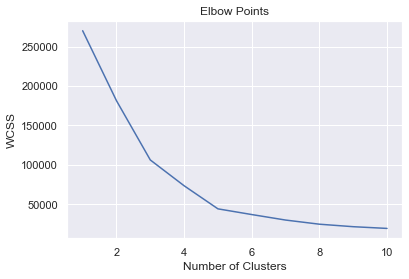

In [39]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Points')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

##### According to the previous graph, the optimum number of clusters =5

In [43]:
Kmeans= KMeans(n_clusters=5, init= 'k-means++', random_state=0)
Y= Kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


#### Visualizing the Clusters and plotting their centroids

Text(0, 0.5, 'Spending Score')

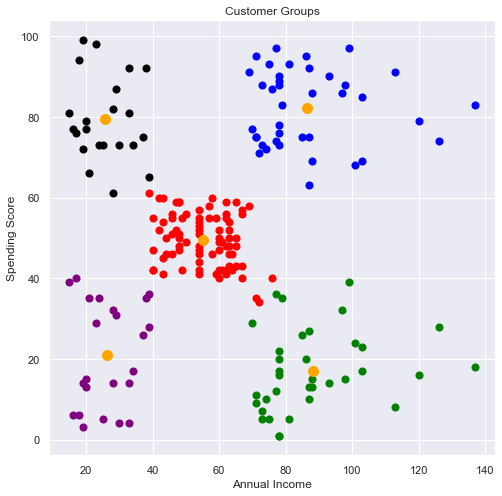

In [58]:
#Plotting the clusters 
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0, 1], s=50, c= 'green', label= 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1, 1], s=50, c= 'red', label= 'Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2, 1], s=50, c= 'blue', label= 'Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3, 1], s=50, c= 'black', label= 'Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4, 1], s=50, c= 'purple', label= 'Cluster 5')

#Plotting the centroids

plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1],
            s= 100, c='orange', label= 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

After Visualizing the customer groups, we can achieve our target by deriving the relations between the different groups